In [1]:
import pandas as pd
from mplsoccer.pitch import Pitch
import numpy as np
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, FontManager, Sbopen


In [2]:
#read csv
df=pd.read_csv("valladolidA.csv")
df # 1678 rows and 13 columns

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1674,2248257159,779,0,0.0,Valladolid,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1676,2248274127,1,0,0.0,Valladolid,0.0,0.0,16,FormationSet,Successful,NaN,NaN,NaN


In [3]:
df = df[df["teamId"]=="Barcelona"]

In [4]:
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2248257083,1028,93,55.0,Barcelona,77.1,49.0,2,SavedShot,Successful,10.0,NaN,NaN
1671,2248257093,1029,93,57.0,Barcelona,86.9,49.6,2,CornerAwarded,Successful,10.0,NaN,NaN
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [5]:
df["passer"] = df["playerId"]
df["recipient"]= df["playerId"].shift(-1)


passes=df[df["type"]=="Pass"]
successful=passes[passes["outcome"]=="Successful"]

C:\Users\User\AppData\Local\Temp\ipykernel_24524\3112080453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["passer"] = df["playerId"]
C:\Users\User\AppData\Local\Temp\ipykernel_24524\3112080453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["recipient"]= df["playerId"].shift(-1)


In [6]:
successful
# I have created a data frame with the successful passes that barcelona
# made during the game
# and for each pass, it contains the information of the player giving 
# and receiving the passes

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [7]:
subs=df[df["type"]=="SubstitutionOff"]
subs=subs["minute"]
firstSub=subs.min()
firstSub #minute of first subs of barcelona

70

In [8]:
successful=successful[successful["minute"]<firstSub]
#filtering the passes of the 11 starting players. 

In [9]:
pas= pd.to_numeric(successful["passer"], downcast="integer")
rec= pd.to_numeric(successful["recipient"], downcast="integer")

successful["passer"]=pas
successful["recipient"]= rec

# to get rid of the float value for the passer and recipient variables

C:\Users\User\AppData\Local\Temp\ipykernel_24524\4281182140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful["passer"]=pas
C:\Users\User\AppData\Local\Temp\ipykernel_24524\4281182140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful["recipient"]= rec


In [10]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9,2
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2,8
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8,2
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2,8


In [11]:
# we need a location for every one of the starting players 
# it is needed for the plot
# to calculate this, we will use the mean of the locations where the psases where made

average_location= successful.groupby("passer").agg({"x":["mean"], "y":["mean","count"]})
average_location.columns=["x","y","count"]
average_location
# this are the counts of successful passes of each player
# and the average location (x and y) of the passes that each player has made

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [12]:
#now we need the number of passes made between each player
pass_between = successful.groupby(["passer","recipient"]).id.count().reset_index()
pass_between.rename({"id":"pass_count"}, axis="columns",inplace=True)


In [13]:
# merge the avergae locaton with the passes between 

pass_between = pass_between.merge(average_location, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_location, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [14]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
18,4,2,1,32.895833,43.518750,48,68.274359,11.915385,39
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
35,9,2,2,69.916667,51.383333,6,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
...,...,...,...,...,...,...,...,...,...
52,15,10,1,38.409091,74.378182,55,63.201613,42.351613,62
60,16,10,10,69.594286,69.471429,35,63.201613,42.351613,62
70,18,10,7,55.242553,83.793617,47,63.201613,42.351613,62
77,21,10,14,55.663636,52.263636,55,63.201613,42.351613,62


In [15]:
pass_between=pass_between[pass_between["pass_count"]>1]
pass_between
#occurences that happen where the number of passes if greater than 1


,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
35,9,2,2,69.916667,51.383333,6,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
49,15,2,2,38.409091,74.378182,55,68.274359,11.915385,39
...,...,...,...,...,...,...,...,...,...
37,9,10,2,69.916667,51.383333,6,63.201613,42.351613,62
60,16,10,10,69.594286,69.471429,35,63.201613,42.351613,62
70,18,10,7,55.242553,83.793617,47,63.201613,42.351613,62
77,21,10,14,55.663636,52.263636,55,63.201613,42.351613,62


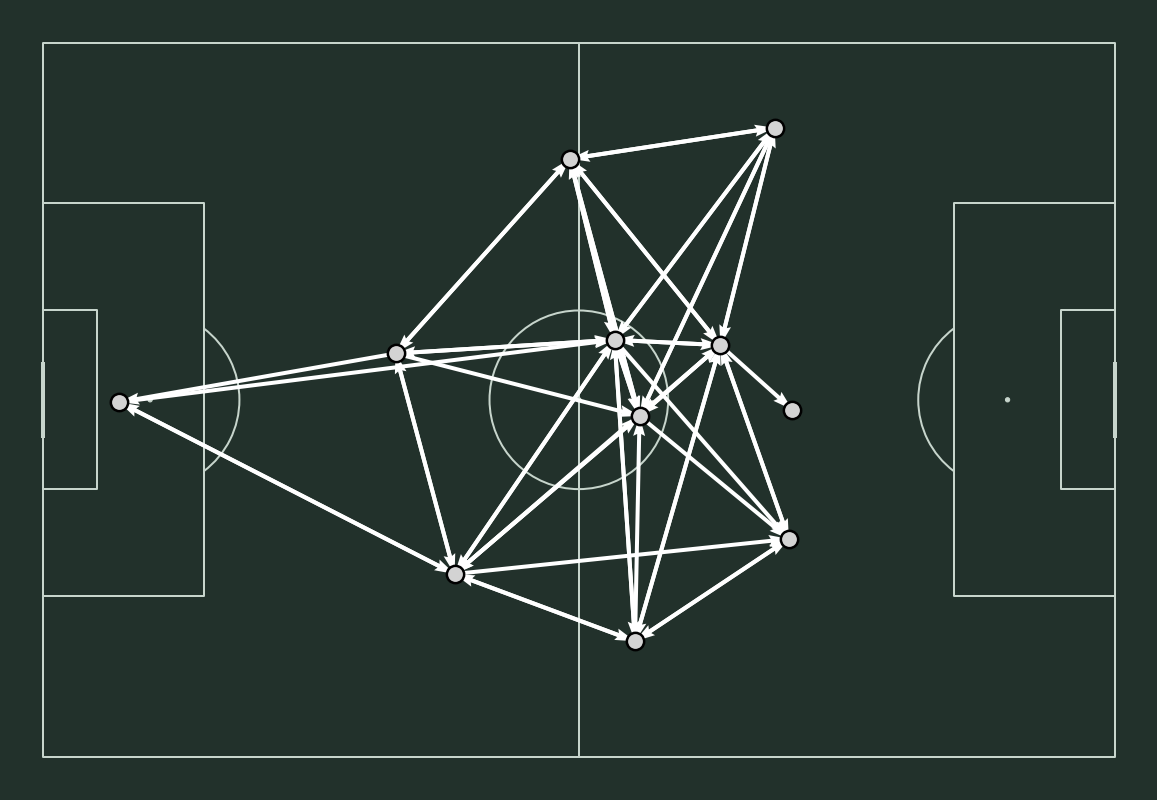

In [16]:
# now we start ploting
pass_between2=pass_between[pass_between["pass_count"]>3]

#plot the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")

arrows = pitch.arrows(1.2*pass_between2.x, .8*pass_between2.y, 1.2*pass_between2.x_end,
                      .8*pass_between2.y_end, ax=ax, color="white")

nodes=pitch.scatter(1.2*average_location.x, 0.8*average_location.y, s=300, color="#d3d3d3",
                   edgecolors="black", linewidth=2.5, alpha=1, ax=ax)


We can make more complex passing networks plots, like the following one: 

In [17]:
#we will determine the width of the passing connections using the pass_count
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() *
                           MAX_LINE_WIDTH)

average_location['marker_size'] = (average_location['count']
                                         / average_location['count'].max() * MAX_MARKER_SIZE)

C:\Users\User\AppData\Local\Temp\ipykernel_24524\1618226411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() *


In [18]:
# Set color to make the lines more transparent when fewer passes are made


MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

In [19]:
# statsbomb data y is inverted: 
pass_between.y=100-pass_between.y
pass_between.y_end=100-pass_between.y_end

average_location.y=100-average_location.y


C:\Users\User\AppData\Local\Temp\ipykernel_24524\4017938804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_between.y=100-pass_between.y
C:\Users\User\AppData\Local\Temp\ipykernel_24524\4017938804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_between.y_end=100-pass_between.y_end


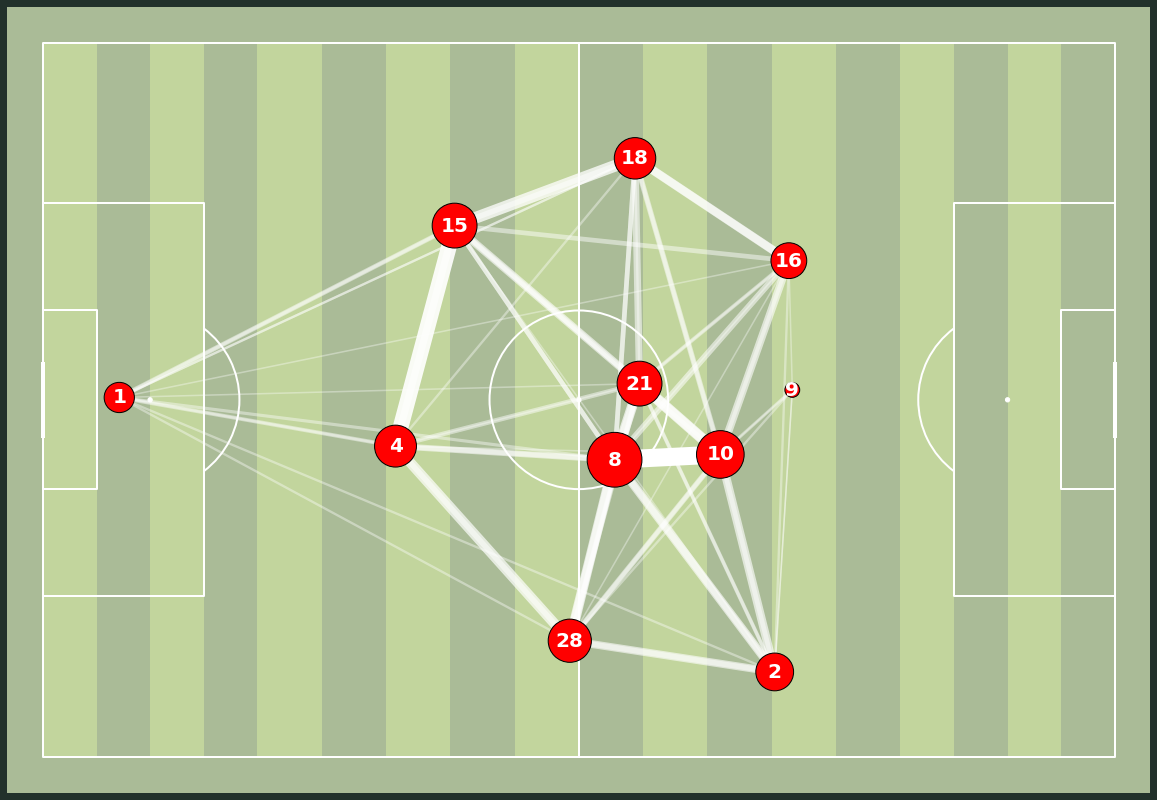

In [33]:
TEAM = 'Barcelona'
OPPONENT = 'versus Valladolid'

#plot the pitch
pitch = Pitch(pitch_type="statsbomb", pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True )  # optional stripes

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")


#number of each player
indexNamesArr = average_location.index.values
listrownames = list(indexNamesArr)

average_location["numbers"]= listrownames

# we plot passing lines and nodes
pass_lines = pitch.lines(1.2*pass_between.x, 0.8*pass_between.y,
                         1.2*pass_between.x_end, 0.8*pass_between.y_end, lw=pass_between.width,
                         color=color, zorder=1, ax=ax)

pass_nodes = pitch.scatter(1.2*average_location.x, 0.8*average_location.y,
                           s=average_location.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)


for index, row in average_location.iterrows():
    pitch.annotate(row.name, xy=(1.2*row.x, 0.8*row.y), c='white', va='center',
                   ha='center', size=20, weight='bold', ax=ax)


